Current Working Directory: c:\Users\risha\Work\PrimeTrade\ds_Rishab_Das\ds_Rishab_Das
Trader Data Sample:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

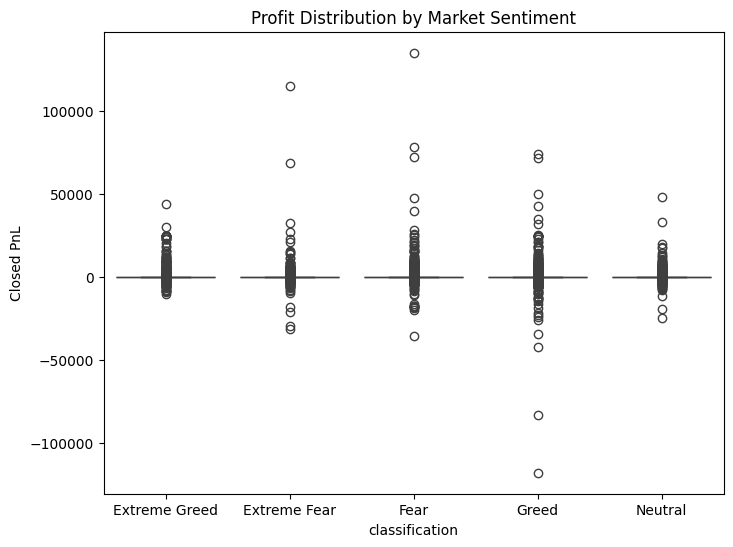

Summary Statistics by Sentiment:
               Closed PnL       
                     mean median
classification                  
Extreme Fear    34.537862    0.0
Extreme Greed   67.892861    0.0
Fear            54.290400    0.0
Greed           42.743559    0.0
Neutral         34.307718    0.0


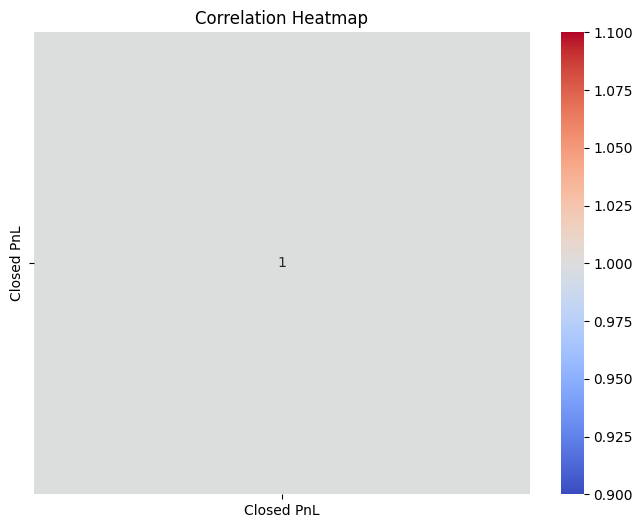

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Current Working Directory:", os.getcwd())

df_trader = pd.read_csv('../needed/csv_files/historical_data.csv')
df_sentiment = pd.read_csv('../needed/csv_files/fear_greed_index.csv')

print("Trader Data Sample:")
print(df_trader.head())

print("Sentiment Data Sample:")
print(df_sentiment.head())

df_trader['date_only'] = pd.to_datetime(df_trader['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
df_sentiment['date_only'] = pd.to_datetime(df_sentiment['date']).dt.date  


df = pd.merge(
    df_trader,
    df_sentiment,
    on='date_only',
    how='left'
)

print("Merged Data Sample:")
print(df.head())

os.makedirs('../needed/outputs', exist_ok=True)

if 'Closed PnL' in df.columns and 'classification' in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='classification', y='Closed PnL', data=df)
    plt.title('Profit Distribution by Market Sentiment')
    plt.savefig('../needed/outputs/profit_by_sentiment.png')
    plt.show()
else:
    print("Warning: 'Closed PnL' or 'classification' column not present in merged DataFrame.")

if 'classification' in df.columns:
    grouped = df.groupby('classification').agg({
        'Closed PnL': ['mean', 'median'] if 'Closed PnL' in df.columns else pd.Series.mean
    })
    print("Summary Statistics by Sentiment:")
    print(grouped)

num_cols = [col for col in ['Closed PnL'] if col in df.columns]
if num_cols:
    plt.figure(figsize=(8,6))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.savefig('../needed/outputs/correlation_heatmap.png')
    plt.show()

df.to_csv('../needed/csv_files/processed_data.csv', index=False)

